In [377]:
import numpy as np
import pandas as pd
import pandas_profiling 
import matplotlib.pyplot as plt 
import getpass
import seaborn as sns 
%matplotlib inline
import snowflake.connector

In [378]:
conn = snowflake.connector.connect(
        user = 'SHASHANKBHAT',
        password = getpass.getpass('Your Snowflake Password: ')
        account = 'egahnyu-kc05980',
        database='RETAILS',
        schema='PUBLIC',
        warehouse='COMPUTE_WH',
  ) 

In [379]:
cur = conn.cursor()

In [380]:
select_demographic_RAW = 'SELECT * FROM demographic_RAW'
select_CAMPAIGN_DESC_RAW = 'SELECT * FROM CAMPAIGN_DESC_RAW'
select_CAMPAIGN_RAW = 'SELECT * FROM CAMPAIGN_RAW'
select_PRODUCT_RAW = 'SELECT * FROM PRODUCT_RAW'
select_COUPON_RAW = 'SELECT * FROM COUPON_RAW'
select_COUPON_REDEMPT_RAW = 'SELECT * FROM COUPON_REDEMPT_RAW'
select_TRANSACTION_RAW = 'SELECT * FROM TRANSACTION_RAW'

In [381]:
cur.execute(select_demographic_RAW)
demographic_RAW = cur.fetch_pandas_all()

In [382]:
cur.execute(select_CAMPAIGN_DESC_RAW)
CAMPAIGN_DESC_RAW = cur.fetch_pandas_all()

In [383]:
cur.execute(select_CAMPAIGN_RAW)
CAMPAIGN_RAW = cur.fetch_pandas_all()

In [384]:
cur.execute(select_PRODUCT_RAW)
PRODUCT_RAW = cur.fetch_pandas_all()

In [385]:
cur.execute(select_COUPON_RAW)
COUPON_RAW = cur.fetch_pandas_all()

In [386]:
cur.execute(select_COUPON_REDEMPT_RAW)
COUPON_REDEMPT_RAW = cur.fetch_pandas_all()

In [387]:
cur.execute(select_TRANSACTION_RAW)
TRANSACTION_RAW = cur.fetch_pandas_all()

In [388]:
cur.close()
conn.close()

In [389]:
demographic_RAW.head(5)

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,HOUSEHOLD_KEY
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [390]:
CAMPAIGN_DESC_RAW.head(5)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [391]:
CAMPAIGN_RAW.head(5)

,DESCRIPTION,HOUSEHOLD_KEY,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [392]:
PRODUCT_RAW.head(5)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [393]:
COUPON_RAW.head(5)

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [394]:
COUPON_REDEMPT_RAW.head(5)

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [395]:
TRANSACTION_RAW.head(5)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0


In [396]:
type(TRANSACTION_RAW)

pandas.core.frame.DataFrame

In [397]:
CAMPAIGN_DESC_RAW.shape

(30, 4)

In [398]:
CAMPAIGN_RAW.shape

(7208, 3)

In [399]:
COUPON_RAW.shape

(124548, 3)

In [400]:
COUPON_REDEMPT_RAW.shape

(2318, 4)

In [401]:
demographic_RAW.shape

(2500, 8)

In [402]:
PRODUCT_RAW.shape

(92353, 7)

In [403]:
TRANSACTION_RAW.shape

(450416, 12)

In [404]:
CAMPAIGN_DESC_RAW.isnull().sum()

DESCRIPTION    0
CAMPAIGN       0
START_DAY      0
END_DAY        0
dtype: int64

In [405]:
CAMPAIGN_DESC_RAW.describe()

,CAMPAIGN,START_DAY,END_DAY
count,30.000000,30.000000,30.000000
mean,15.500000,463.866667,510.466667
std,8.803408,134.488490,137.730555
min,1.000000,224.000000,264.000000
25%,8.250000,360.000000,405.750000
50%,15.500000,470.000000,502.000000
75%,22.750000,584.000000,640.250000
max,30.000000,659.000000,719.000000


In [406]:
PRODUCT_RAW.isnull().sum()

PRODUCT_ID              0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64

In [407]:
PRODUCT_RAW.describe()

,PRODUCT_ID,MANUFACTURER
count,9.235300e+04,92353.00000
mean,5.328353e+06,1739.22833
std,5.359937e+06,1818.26957
min,2.567100e+04,1.00000
25%,9.706280e+05,328.00000
50%,1.621091e+06,1094.00000
75%,9.704770e+06,2264.00000
max,1.831630e+07,6477.00000


In [408]:
demographic_RAW.isnull().sum()

AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
HOUSEHOLD_KEY          0
dtype: int64

In [409]:
demographic_RAW.describe()

,HOUSEHOLD_KEY
count,2500.00000
mean,1250.50000
std,721.83216
min,1.00000
25%,625.75000
50%,1250.50000
75%,1875.25000
max,2500.00000


In [410]:
COUPON_RAW.isnull().sum()

COUPON_UPC    0
PRODUCT_ID    0
CAMPAIGN      0
dtype: int64

In [411]:
COUPON_RAW.describe()


,COUPON_UPC,PRODUCT_ID,CAMPAIGN
count,1.245480e+05,1.245480e+05,124548.000000
mean,2.198225e+10,4.651277e+06,15.855935
std,1.961641e+10,4.843450e+06,6.015524
min,1.000009e+10,2.567100e+04,1.000000
25%,1.000009e+10,9.593030e+05,13.000000
50%,1.000009e+10,1.411451e+06,14.000000
75%,5.111108e+10,8.357538e+06,18.000000
max,5.998660e+10,1.814854e+07,30.000000


In [412]:
COUPON_REDEMPT_RAW.isnull().sum()

HOUSEHOLD_KEY    0
DAY              0
COUPON_UPC       0
CAMPAIGN         0
dtype: int64

In [413]:
COUPON_REDEMPT_RAW.describe()

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
count,2318.000000,2318.000000,2.318000e+03,2318.000000
mean,1302.816652,528.217429,4.123049e+10,15.551337
std,783.002545,100.360985,1.986068e+10,5.716636
min,1.000000,225.000000,1.000009e+10,1.000000
25%,588.000000,458.250000,1.000009e+10,13.000000
50%,1396.500000,532.000000,5.234003e+10,14.000000
75%,2004.000000,605.000000,5.430002e+10,18.000000
max,2500.000000,704.000000,5.897850e+10,30.000000


In [414]:
TRANSACTION_RAW.isnull().sum()

HOUSEHOLD_KEY        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [415]:
TRANSACTION_RAW.describe()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,450416.00000,4.504160e+05,450416.000000,4.504160e+05,450416.000000,450416.000000,450416.000000,450416.000000,450416.000000,450416.000000,450416.000000,450416.000000
mean,1259.55822,2.840143e+10,112.470718,2.209464e+06,86.522561,3.018436,2586.661648,-0.552774,1583.582364,16.754487,-0.014860,-0.001920
std,728.10869,5.792110e+08,42.064258,2.726512e+06,1058.788785,3.860427,7996.435988,1.186736,415.130098,6.018864,0.195378,0.044335
min,1.00000,2.698485e+10,1.000000,2.567100e+04,0.000000,0.000000,1.000000,-75.000000,0.000000,1.000000,-17.000000,-3.000000
25%,641.00000,2.798531e+10,84.000000,9.118780e+05,1.000000,1.250000,330.000000,-0.740000,1317.000000,13.000000,0.000000,0.000000
50%,1234.00000,2.839168e+10,117.000000,1.016800e+06,1.000000,2.000000,369.000000,-0.090000,1630.000000,17.000000,0.000000,0.000000
75%,1914.00000,2.886773e+10,147.000000,1.115360e+06,1.000000,3.390000,421.000000,0.000000,1906.000000,22.000000,0.000000,0.000000
max,2500.00000,2.933965e+10,176.000000,1.260019e+07,51912.000000,400.000000,32124.000000,0.000000,2359.000000,26.000000,0.000000,0.000000


In [416]:
TRANSACTION_RAW.dtypes

HOUSEHOLD_KEY          int16
BASKET_ID              int64
DAY                    int16
PRODUCT_ID             int32
QUANTITY               int32
SALES_VALUE          float64
STORE_ID               int16
RETAIL_DISC          float64
TRANS_TIME             int16
WEEK_NO                 int8
COUPON_DISC             int8
COUPON_MATCH_DISC       int8
dtype: object

**Data Modifications**

In [417]:
from datetime import datetime,timedelta

In [418]:
start_date = pd.to_datetime('2019-01-01')

In [419]:
start_date

Timestamp('2019-01-01 00:00:00')

In [420]:
TRANSACTION_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0


In [421]:
TRANSACTION_RAW['Date'] = start_date + pd.to_timedelta(TRANSACTION_RAW['DAY'],unit='D')

In [422]:
TRANSACTION_RAW['Date'].head()

0   2019-01-02
1   2019-01-02
2   2019-01-02
3   2019-01-02
4   2019-01-02
Name: Date, dtype: datetime64[ns]

In [423]:
TRANSACTION_RAW.columns

Index(['HOUSEHOLD_KEY', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'Date'],
      dtype='object')

In [424]:
CAMPAIGN_DESC_RAW['Start_Date'] = start_date + pd.to_timedelta(CAMPAIGN_DESC_RAW['START_DAY'],unit='D')

In [425]:
CAMPAIGN_DESC_RAW.columns

Index(['DESCRIPTION', 'CAMPAIGN', 'START_DAY', 'END_DAY', 'Start_Date'], dtype='object')

In [426]:
CAMPAIGN_DESC_RAW['END_DATE'] = start_date + pd.to_timedelta(CAMPAIGN_DESC_RAW['END_DAY'],unit='D')

In [427]:
CAMPAIGN_DESC_RAW['Start_Date'].head() 

0   2020-10-21
1   2020-07-01
2   2020-10-21
3   2020-09-07
4   2020-10-08
Name: Start_Date, dtype: datetime64[ns]

In [428]:
CAMPAIGN_DESC_RAW['END_DATE'].head()

0   2020-12-20
1   2020-12-09
2   2020-11-22
3   2020-11-16
4   2020-11-15
Name: END_DATE, dtype: datetime64[ns]

In [429]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,Start_Date,END_DATE
0,TypeB,24,659,719,2020-10-21,2020-12-20
1,TypeC,15,547,708,2020-07-01,2020-12-09
2,TypeB,25,659,691,2020-10-21,2020-11-22
3,TypeC,20,615,685,2020-09-07,2020-11-16
4,TypeB,23,646,684,2020-10-08,2020-11-15


In [430]:
CAMPAIGN_DESC_RAW['CAMPAIGN_DURATION'] = CAMPAIGN_DESC_RAW['END_DAY'] - CAMPAIGN_DESC_RAW['START_DAY']

In [431]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,Start_Date,END_DATE,CAMPAIGN_DURATION
0,TypeB,24,659,719,2020-10-21,2020-12-20,60
1,TypeC,15,547,708,2020-07-01,2020-12-09,161
2,TypeB,25,659,691,2020-10-21,2020-11-22,32
3,TypeC,20,615,685,2020-09-07,2020-11-16,70
4,TypeB,23,646,684,2020-10-08,2020-11-15,38


In [432]:
COUPON_REDEMPT_RAW.head()

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [433]:
COUPON_REDEMPT_RAW['DATE']  = start_date + pd.to_timedelta(COUPON_REDEMPT_RAW['DAY'],unit='D')

In [434]:
COUPON_REDEMPT_RAW.head()

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN,DATE
0,1,421,10000085364,8,2020-02-26
1,1,421,51700010076,8,2020-02-26
2,1,427,54200000033,8,2020-03-03
3,1,597,10000085476,18,2020-08-20
4,1,597,54200029176,18,2020-08-20


In [435]:
TRANSACTION_RAW.Date.max()

Timestamp('2019-06-26 00:00:00')

In [436]:
CAMPAIGN_DESC_RAW['END_DATE'].max()

Timestamp('2020-12-20 00:00:00')

Understanding the dataset

In [437]:
demographic_RAW.shape

(2500, 8)

In [438]:
demographic_RAW.columns

Index(['AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC',
       'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC',
       'HOUSEHOLD_KEY'],
      dtype='object')

In [439]:
demographic_RAW.isnull().sum()

AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
HOUSEHOLD_KEY          0
dtype: int64

In [440]:
demographic_RAW.dtypes

AGE_DESC               object
MARITAL_STATUS_CODE    object
INCOME_DESC            object
HOMEOWNER_DESC         object
HH_COMP_DESC           object
HOUSEHOLD_SIZE_DESC    object
KID_CATEGORY_DESC      object
HOUSEHOLD_KEY           int16
dtype: object

In [441]:
demographic_RAW['AGE_DESC'].value_counts()

45-54    901
35-44    594
25-34    445
65+      230
55-64    187
19-24    143
Name: AGE_DESC, dtype: int64

In [442]:
demographic_RAW.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,HOUSEHOLD_KEY
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [443]:
demographic_RAW['INCOME_DESC'].unique()

array(['35-49K', '50-74K', '25-34K', '75-99K', 'Under 15K', '100-124K',
       '15-24K', '125-149K', '150-174K', '250K+', '175-199K', '200-249K'],
      dtype=object)

In [444]:
demographic_RAW['INCOME_DESC'].value_counts()

50-74K       588
35-49K       540
75-99K       305
15-24K       238
25-34K       237
Under 15K    193
125-149K     118
100-124K     109
150-174K      96
175-199K      33
250K+         29
200-249K      14
Name: INCOME_DESC, dtype: int64

In [445]:
demographic_RAW['MARITAL_STATUS_CODE'].value_counts()

U    1087
A    1052
B     361
Name: MARITAL_STATUS_CODE, dtype: int64

In [446]:
demographic_RAW['HOUSEHOLD_SIZE_DESC'].value_counts()

2     1004
1      783
3      338
5+     206
4      169
Name: HOUSEHOLD_SIZE_DESC, dtype: int64

In [447]:
CAMPAIGN_RAW.shape

(7208, 3)

In [448]:
CAMPAIGN_DESC_RAW.shape

(30, 7)

In [449]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,Start_Date,END_DATE,CAMPAIGN_DURATION
0,TypeB,24,659,719,2020-10-21,2020-12-20,60
1,TypeC,15,547,708,2020-07-01,2020-12-09,161
2,TypeB,25,659,691,2020-10-21,2020-11-22,32
3,TypeC,20,615,685,2020-09-07,2020-11-16,70
4,TypeB,23,646,684,2020-10-08,2020-11-15,38


In [450]:
CAMPAIGN_DESC_RAW['CAMPAIGN_DURATION'].mean()

46.6

**Average duration of a campagin is 46.6 Day's.**

In [451]:
CAMPAIGN_DESC_RAW.dtypes

DESCRIPTION                  object
CAMPAIGN                       int8
START_DAY                     int16
END_DAY                       int16
Start_Date           datetime64[ns]
END_DATE             datetime64[ns]
CAMPAIGN_DURATION             int16
dtype: object

<AxesSubplot:xlabel='CAMPAIGN', ylabel='CAMPAIGN_DURATION'>

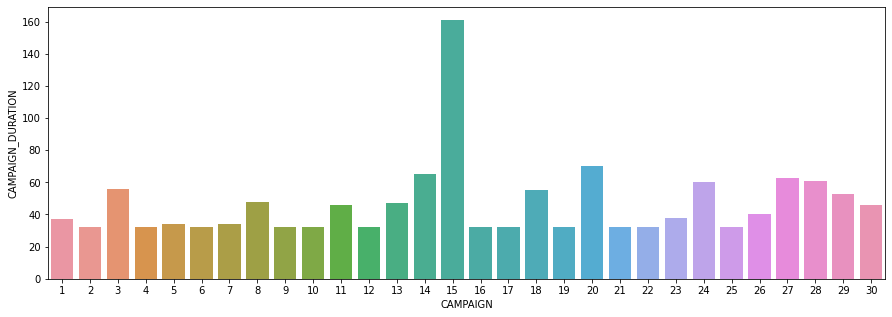

In [452]:
plt.figure(figsize=(15,5))
sns.barplot(x='CAMPAIGN',y='CAMPAIGN_DURATION',data=CAMPAIGN_DESC_RAW)

**CAMPAIGN 15 LASTED MORE THAN 160 DAYS.**

In [453]:
CAMPAIGN_DESC_RAW.groupby('CAMPAIGN')['CAMPAIGN_DURATION'].sum()

CAMPAIGN
1      37
2      32
3      56
4      32
5      34
6      32
7      34
8      48
9      32
10     32
11     46
12     32
13     47
14     65
15    161
16     32
17     32
18     55
19     32
20     70
21     32
22     32
23     38
24     60
25     32
26     40
27     63
28     61
29     53
30     46
Name: CAMPAIGN_DURATION, dtype: int16

In [454]:
CAMPAIGN_DESC_RAW.groupby('DESCRIPTION').aggregate({'CAMPAIGN':'count','CAMPAIGN_DURATION':'mean'})

,CAMPAIGN,CAMPAIGN_DURATION
DESCRIPTION,,
TypeA,5,47.200000
TypeB,19,37.631579
TypeC,6,74.500000


**There have been 19 type B campaigns, whose average length was 38 days. In comparison, there has been 6 type C campaigns of 75 days on average.**

In [455]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,Start_Date,END_DATE,CAMPAIGN_DURATION
0,TypeB,24,659,719,2020-10-21,2020-12-20,60
1,TypeC,15,547,708,2020-07-01,2020-12-09,161
2,TypeB,25,659,691,2020-10-21,2020-11-22,32
3,TypeC,20,615,685,2020-09-07,2020-11-16,70
4,TypeB,23,646,684,2020-10-08,2020-11-15,38


In [456]:
import datetime as dt

In [457]:
CAMPAIGN_DESC_RAW['START_MONTH'] = CAMPAIGN_DESC_RAW['Start_Date'].dt.strftime('%m')

In [458]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,Start_Date,END_DATE,CAMPAIGN_DURATION,START_MONTH
0,TypeB,24,659,719,2020-10-21,2020-12-20,60,10
1,TypeC,15,547,708,2020-07-01,2020-12-09,161,07
2,TypeB,25,659,691,2020-10-21,2020-11-22,32,10
3,TypeC,20,615,685,2020-09-07,2020-11-16,70,09
4,TypeB,23,646,684,2020-10-08,2020-11-15,38,10


In [459]:
CAMPAIGN_DESC_RAW['START_YEAR'] = CAMPAIGN_DESC_RAW['Start_Date'].dt.strftime('%Y')

In [460]:
CAMPAIGN_DESC_RAW['END_YEAR'] = CAMPAIGN_DESC_RAW['END_DATE'].dt.strftime('%Y')

In [461]:
CAMPAIGN_DESC_RAW['END_MONTH'] = CAMPAIGN_DESC_RAW['END_DATE'].dt.strftime('%m')

In [462]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,Start_Date,END_DATE,CAMPAIGN_DURATION,START_MONTH,START_YEAR,END_YEAR,END_MONTH
0,TypeB,24,659,719,2020-10-21,2020-12-20,60,10,2020,2020,12
1,TypeC,15,547,708,2020-07-01,2020-12-09,161,07,2020,2020,12
2,TypeB,25,659,691,2020-10-21,2020-11-22,32,10,2020,2020,11
3,TypeC,20,615,685,2020-09-07,2020-11-16,70,09,2020,2020,11
4,TypeB,23,646,684,2020-10-08,2020-11-15,38,10,2020,2020,11


In [463]:
CAMPAIGN_DESC_RAW.dtypes

DESCRIPTION                  object
CAMPAIGN                       int8
START_DAY                     int16
END_DAY                       int16
Start_Date           datetime64[ns]
END_DATE             datetime64[ns]
CAMPAIGN_DURATION             int16
START_MONTH                  object
START_YEAR                   object
END_YEAR                     object
END_MONTH                    object
dtype: object

In [464]:
CAMPAIGN_RAW.shape

(7208, 3)

In [465]:
CAMPAIGN_RAW.columns

Index(['DESCRIPTION', 'HOUSEHOLD_KEY', 'CAMPAIGN'], dtype='object')

In [466]:
CAMPAIGN_RAW.isnull().sum()

DESCRIPTION      0
HOUSEHOLD_KEY    0
CAMPAIGN         0
dtype: int64

In [467]:
CAMPAIGN_RAW.nunique()

DESCRIPTION         3
HOUSEHOLD_KEY    1584
CAMPAIGN           30
dtype: int64

In [468]:
CAMPAIGN_RAW['HOUSEHOLD_KEY'].nunique()

1584

In [469]:
TRANSACTION_RAW['HOUSEHOLD_KEY'].nunique()

2494

**There are 1584 households have participed to the campaign, leaving 916 households who never participated to any campaign.**

In [470]:
CAMPAIGN_RAW.dtypes

DESCRIPTION      object
HOUSEHOLD_KEY     int16
CAMPAIGN           int8
dtype: object

In [471]:
CAMPAIGN_RAW.groupby('HOUSEHOLD_KEY')['CAMPAIGN'].count()

HOUSEHOLD_KEY
1       8
2       1
3       3
4       1
6       4
       ..
2496    5
2497    3
2498    6
2499    2
2500    8
Name: CAMPAIGN, Length: 1584, dtype: int64

Text(0, 0.5, 'Number of Households Reached To')

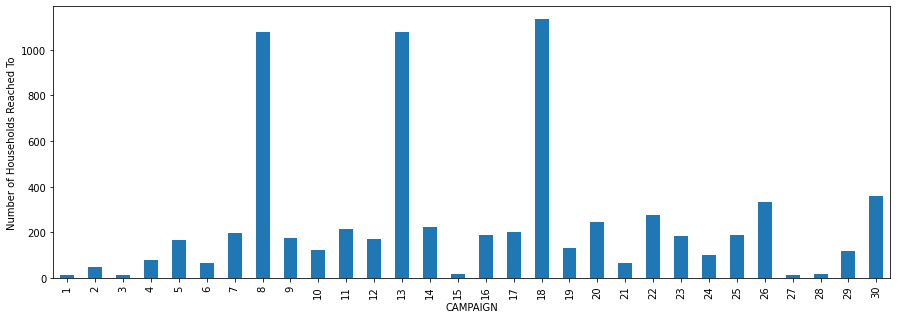

In [472]:
plt.figure(figsize=(15,5))
CAMPAIGN_RAW.groupby('CAMPAIGN')['HOUSEHOLD_KEY'].count().plot.bar()
plt.ylabel('Number of Households Reached To')

**Number of households per campaigns.
We can see in Campaign18 maximum number of households were involved**

In [473]:
COUPON_RAW.shape

(124548, 3)

In [474]:
COUPON_RAW.columns

Index(['COUPON_UPC', 'PRODUCT_ID', 'CAMPAIGN'], dtype='object')

In [475]:
COUPON_RAW.dtypes

COUPON_UPC    int64
PRODUCT_ID    int32
CAMPAIGN       int8
dtype: object

In [476]:
COUPON_RAW.isnull().sum()

COUPON_UPC    0
PRODUCT_ID    0
CAMPAIGN      0
dtype: int64

In [477]:
COUPON_RAW['COUPON_UPC'].nunique()

1135

In [478]:
Coupon_Given = COUPON_RAW.groupby("CAMPAIGN").aggregate(Total_product= ('PRODUCT_ID','nunique'),Total_Coupon_given= ('COUPON_UPC','nunique'))

In [479]:
COUPON_RAW.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [480]:
Coupon_Given.head()

,Total_product,Total_Coupon_given
CAMPAIGN,,
1,383,11
2,301,16
3,506,34
4,200,12
5,443,11


In [481]:
Coupon_Given.sort_values(by='Total_product',ascending=False).head()

,Total_product,Total_Coupon_given
CAMPAIGN,,
13,35616,207
18,35513,209
8,17178,209
26,3396,181
30,3205,181


In [482]:
CAMPAIGN_DESC_RAW.columns

Index(['DESCRIPTION', 'CAMPAIGN', 'START_DAY', 'END_DAY', 'Start_Date',
       'END_DATE', 'CAMPAIGN_DURATION', 'START_MONTH', 'START_YEAR',
       'END_YEAR', 'END_MONTH'],
      dtype='object')

In [483]:
Coupon_Given.columns

Index(['Total_product', 'Total_Coupon_given'], dtype='object')

In [484]:
Coupon_Given = Coupon_Given.merge(right=CAMPAIGN_DESC_RAW,how='left',on='CAMPAIGN')

In [485]:
Coupon_Given.head()

,CAMPAIGN,Total_product,Total_Coupon_given,DESCRIPTION,START_DAY,END_DAY,Start_Date,END_DATE,CAMPAIGN_DURATION,START_MONTH,START_YEAR,END_YEAR,END_MONTH
0,1,383,11,TypeB,346,383,2019-12-13,2020-01-19,37,12,2019,2020,01
1,2,301,16,TypeB,351,383,2019-12-18,2020-01-19,32,12,2019,2020,01
2,3,506,34,TypeC,356,412,2019-12-23,2020-02-17,56,12,2019,2020,02
3,4,200,12,TypeB,372,404,2020-01-08,2020-02-09,32,01,2020,2020,02
4,5,443,11,TypeB,377,411,2020-01-13,2020-02-16,34,01,2020,2020,02


In [486]:
Coupon_Given.columns

Index(['CAMPAIGN', 'Total_product', 'Total_Coupon_given', 'DESCRIPTION',
       'START_DAY', 'END_DAY', 'Start_Date', 'END_DATE', 'CAMPAIGN_DURATION',
       'START_MONTH', 'START_YEAR', 'END_YEAR', 'END_MONTH'],
      dtype='object')

In [487]:
Coupon_Given.loc[:,('CAMPAIGN','Total_product','Total_Coupon_given','START_YEAR','END_YEAR','START_MONTH','END_MONTH','DESCRIPTION','CAMPAIGN_DURATION')].sort_values(by='Total_product',
                    ascending=False).head(10)

,CAMPAIGN,Total_product,Total_Coupon_given,START_YEAR,END_YEAR,START_MONTH,END_MONTH,DESCRIPTION,CAMPAIGN_DURATION
12,13,35616,207,2020,2020,05,07,TypeA,47
17,18,35513,209,2020,2020,08,10,TypeA,55
7,8,17178,209,2020,2020,02,04,TypeA,48
25,26,3396,181,2019,2019,08,09,TypeA,40
29,30,3205,181,2019,2020,11,01,TypeA,46
21,22,1917,21,2020,2020,09,10,TypeB,32
23,24,1887,2,2020,2020,10,12,TypeB,60
15,16,1025,13,2020,2020,07,08,TypeB,32
24,25,826,17,2020,2020,10,11,TypeB,32
8,9,825,18,2020,2020,03,04,TypeB,32


**campaign 13,18,8 are the one with most product in them.**

In [488]:
COUPON_RAW.columns

Index(['COUPON_UPC', 'PRODUCT_ID', 'CAMPAIGN'], dtype='object')

In [489]:
PRODUCT_RAW.columns

Index(['PRODUCT_ID', 'MANUFACTURER', 'DEPARTMENT', 'BRAND', 'COMMODITY_DESC',
       'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT'],
      dtype='object')

In [490]:
coupon_product = COUPON_RAW.merge(right=PRODUCT_RAW,how='left',on='PRODUCT_ID')

In [491]:
coupon_product.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,10000089061,27160,4,69,GROCERY,Private,SHORTENING/OIL,VEGETABLE/SALAD OIL,48 OZ
1,10000089064,27754,9,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ
2,10000089073,28897,12,69,GROCERY,Private,EGGS,EGGS - X-LARGE,A D 1 DZ
3,51800009050,28919,28,236,GROCERY,National,REFRGRATD DOUGH PRODUCTS,REFRIGERATED COOKIES-CHUB,16.5 OZ
4,52100000076,28929,25,317,GROCERY,National,CHEESE,STRING CHEESE,AB 8 OZ


In [492]:
coupon_product.shape

(124548, 9)

In [493]:
PRODUCT_RAW.shape

(92353, 7)

In [494]:
COUPON_RAW.shape

(124548, 3)

In [495]:
coupon_product.isnull().sum()

COUPON_UPC              0
PRODUCT_ID              0
CAMPAIGN                0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64

In [496]:
coupon_product['COMMODITY_DESC'].value_counts().head(10)

HAIR CARE PRODUCTS        6261
MAKEUP AND TREATMENT      5585
FRZN MEAT/MEAT DINNERS    4893
FROZEN PIZZA              3658
BEEF                      3314
ICE CREAM/MILK/SHERBTS    3257
CHEESE                    3146
YOGURT                    2460
ORAL HYGIENE PRODUCTS     2437
LUNCHMEAT                 2425
Name: COMMODITY_DESC, dtype: int64

**Most prominent products among coupons created are bathroom products such as hair care and makeup.**

In [497]:
COUPON_REDEMPT_RAW.shape

(2318, 5)

In [498]:
COUPON_REDEMPT_RAW.columns

Index(['HOUSEHOLD_KEY', 'DAY', 'COUPON_UPC', 'CAMPAIGN', 'DATE'], dtype='object')

In [499]:
COUPON_REDEMPT_RAW['COUPON_UPC'].nunique()

556

**Only 556 Coupon has been used out of 1135**

<AxesSubplot:xlabel='CAMPAIGN'>

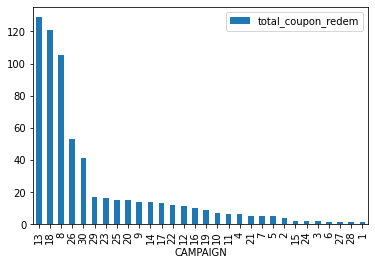

In [500]:
COUPON_REDEMPT_RAW.groupby('CAMPAIGN').agg(total_coupon_redem=('COUPON_UPC','nunique')).sort_values(by='total_coupon_redem',ascending=False).plot.bar()

In [501]:
Coupon_redeem = COUPON_REDEMPT_RAW.groupby('CAMPAIGN').agg(total_coupon_redem=('COUPON_UPC','nunique'))

In [502]:
Coupon_redeem.sort_values(ascending=False,by='total_coupon_redem').head()

,total_coupon_redem
CAMPAIGN,
13,129
18,121
8,105
26,53
30,41


In [503]:
Coupon_Given.head()

,CAMPAIGN,Total_product,Total_Coupon_given,DESCRIPTION,START_DAY,END_DAY,Start_Date,END_DATE,CAMPAIGN_DURATION,START_MONTH,START_YEAR,END_YEAR,END_MONTH
0,1,383,11,TypeB,346,383,2019-12-13,2020-01-19,37,12,2019,2020,01
1,2,301,16,TypeB,351,383,2019-12-18,2020-01-19,32,12,2019,2020,01
2,3,506,34,TypeC,356,412,2019-12-23,2020-02-17,56,12,2019,2020,02
3,4,200,12,TypeB,372,404,2020-01-08,2020-02-09,32,01,2020,2020,02
4,5,443,11,TypeB,377,411,2020-01-13,2020-02-16,34,01,2020,2020,02


In [504]:
Coupon_redeem = Coupon_redeem.merge(right=Coupon_Given,how='left',on='CAMPAIGN')

In [505]:
Coupon_redeem.head()

,CAMPAIGN,total_coupon_redem,Total_product,Total_Coupon_given,DESCRIPTION,START_DAY,END_DAY,Start_Date,END_DATE,CAMPAIGN_DURATION,START_MONTH,START_YEAR,END_YEAR,END_MONTH
0,1,1,383,11,TypeB,346,383,2019-12-13,2020-01-19,37,12,2019,2020,01
1,2,4,301,16,TypeB,351,383,2019-12-18,2020-01-19,32,12,2019,2020,01
2,3,2,506,34,TypeC,356,412,2019-12-23,2020-02-17,56,12,2019,2020,02
3,4,6,200,12,TypeB,372,404,2020-01-08,2020-02-09,32,01,2020,2020,02
4,5,5,443,11,TypeB,377,411,2020-01-13,2020-02-16,34,01,2020,2020,02


In [506]:
Coupon_redeem['Coupon_redeem_rate'] = (Coupon_redeem['total_coupon_redem']/Coupon_redeem['Total_Coupon_given'])*100

In [507]:
Coupon_redeem.head()

,CAMPAIGN,total_coupon_redem,Total_product,Total_Coupon_given,DESCRIPTION,START_DAY,END_DAY,Start_Date,END_DATE,CAMPAIGN_DURATION,START_MONTH,START_YEAR,END_YEAR,END_MONTH,Coupon_redeem_rate
0,1,1,383,11,TypeB,346,383,2019-12-13,2020-01-19,37,12,2019,2020,01,9.090909
1,2,4,301,16,TypeB,351,383,2019-12-18,2020-01-19,32,12,2019,2020,01,25.000000
2,3,2,506,34,TypeC,356,412,2019-12-23,2020-02-17,56,12,2019,2020,02,5.882353
3,4,6,200,12,TypeB,372,404,2020-01-08,2020-02-09,32,01,2020,2020,02,50.000000
4,5,5,443,11,TypeB,377,411,2020-01-13,2020-02-16,34,01,2020,2020,02,45.454545


<AxesSubplot:xlabel='CAMPAIGN', ylabel='total_coupon_redem'>

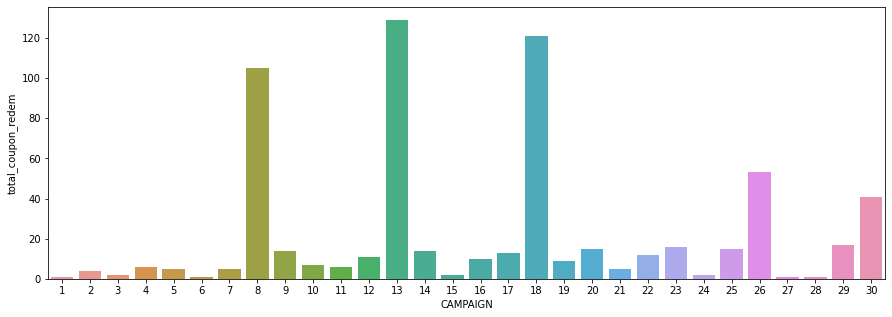

In [508]:
plt.figure(figsize=(15,5))
sns.barplot(x='CAMPAIGN',y='total_coupon_redem',data=Coupon_redeem)

In [509]:
TRANSACTION_RAW.shape

(450416, 13)

In [510]:
TRANSACTION_RAW.columns

Index(['HOUSEHOLD_KEY', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'Date'],
      dtype='object')

In [511]:
TRANSACTION_RAW.isnull().sum()

HOUSEHOLD_KEY        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
Date                 0
dtype: int64

In [512]:
TRANSACTION_RAW['BASKET_ID'].count()

450416

In [513]:
TRANSACTION_RAW.columns

Index(['HOUSEHOLD_KEY', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'Date'],
      dtype='object')

In [514]:
TRANSACTION_RAW['HOUSEHOLD_KEY'].nunique()

2494

In [515]:
trnx_bucket = TRANSACTION_RAW.groupby('BASKET_ID').aggregate({'SALES_VALUE':'sum','COUPON_DISC':'sum','COUPON_MATCH_DISC':'sum'})

In [516]:
trnx_bucket.head()

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC
BASKET_ID,,,
26984851472,5.91,0,0
26984851516,12.43,0,0
26984896261,11.37,0,0
26984905972,2.55,0,0
26984945254,3.53,0,0


In [517]:
trnx_bucket['Use_coupon'] = trnx_bucket['COUPON_DISC']!=0

In [518]:
trnx_bucket['Use_coupon'].value_counts()

False    47892
True      2587
Name: Use_coupon, dtype: int64

In [519]:
trnx_bucket.sort_values('SALES_VALUE',ascending=False).head()

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC,Use_coupon
BASKET_ID,,,,
27534431747,465.70,-3,-1,True
27798435271,463.17,-2,-2,True
27093315740,400.79,0,0,False
28941937397,400.56,-1,0,True
28210676830,391.05,0,0,False


In [520]:
round(trnx_bucket['SALES_VALUE'].mean(),2)

26.93

**The average basket value is $29.14**

Text(0.5, 1.0, 'Basket value boxplot')

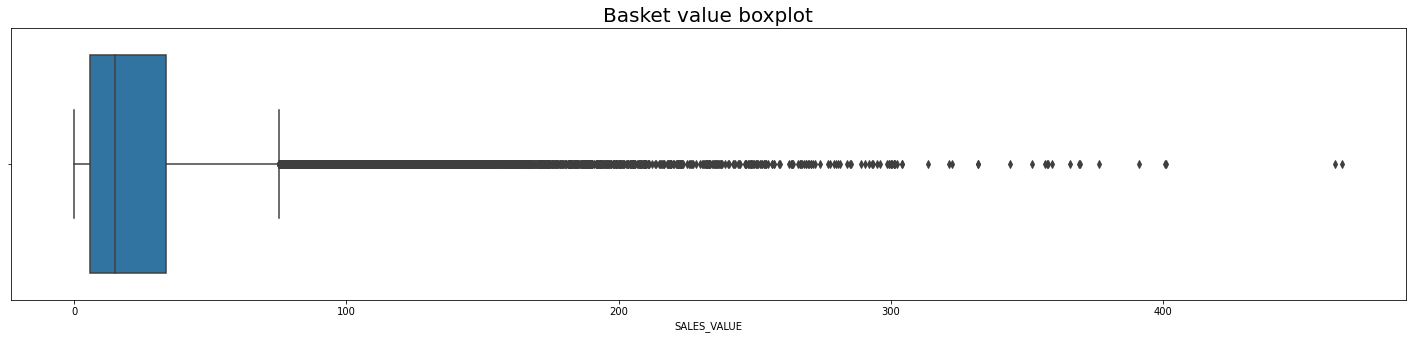

In [521]:
plt.figure(figsize=(25,5))
sns.boxplot(x=trnx_bucket['SALES_VALUE'])
plt.title("Basket value boxplot",fontsize = 20)

In [522]:
trnx_bucket.columns

Index(['SALES_VALUE', 'COUPON_DISC', 'COUPON_MATCH_DISC', 'Use_coupon'], dtype='object')

In [523]:
trnx_bucket.groupby('Use_coupon').aggregate( sales_mean=('SALES_VALUE','mean'),
                                             COUPON_DISC_mean =('COUPON_DISC','mean'),
                                             COUPON_MATCH_DISC=('COUPON_MATCH_DISC','mean'),
                                             No_coupon  =('SALES_VALUE','count'))

,sales_mean,COUPON_DISC_mean,COUPON_MATCH_DISC,No_coupon
Use_coupon,,,,
False,25.009980,0.000000,0.000000,47892
True,62.533348,-2.587167,-0.334364,2587


The average basket value without a coupon is $25.

The average basket value with a coupon is $62.53.

The average discount generated by coupons is $2.58

It shows that customeer purchase more product when coupon is given to them.

In [524]:
trnx_bucket.head()

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC,Use_coupon
BASKET_ID,,,,
26984851472,5.91,0,0,False
26984851516,12.43,0,0,False
26984896261,11.37,0,0,False
26984905972,2.55,0,0,False
26984945254,3.53,0,0,False


In [525]:
trnx_desc = TRANSACTION_RAW.merge(right=trnx_bucket,how='left',on='BASKET_ID')

In [526]:
trnx_desc.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC_x,COUPON_MATCH_DISC_x,Date,SALES_VALUE_y,COUPON_DISC_y,COUPON_MATCH_DISC_y,Use_coupon
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2019-01-02,5.91,0,0,False
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2019-01-02,5.91,0,0,False
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2019-01-02,5.91,0,0,False
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2019-01-02,5.91,0,0,False
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2019-01-02,5.91,0,0,False


In [527]:
trnx_desc.columns

Index(['HOUSEHOLD_KEY', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE_x', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC_x', 'COUPON_MATCH_DISC_x', 'Date', 'SALES_VALUE_y',
       'COUPON_DISC_y', 'COUPON_MATCH_DISC_y', 'Use_coupon'],
      dtype='object')

In [528]:
trnx_desc = trnx_desc.merge(right=PRODUCT_RAW, how='left', on= 'PRODUCT_ID')

In [529]:
trnx_desc.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,SALES_VALUE_y,COUPON_DISC_y,COUPON_MATCH_DISC_y,Use_coupon,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,...,5.91,0,0,False,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,...,5.91,0,0,False,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,...,5.91,0,0,False,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,...,5.91,0,0,False,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,...,5.91,0,0,False,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB


In [530]:
trnx_desc.drop(['SALES_VALUE_y','COUPON_DISC_y','COUPON_MATCH_DISC_y'],axis=1,inplace=True)

In [531]:
trnx_desc.columns

Index(['HOUSEHOLD_KEY', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE_x', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC_x', 'COUPON_MATCH_DISC_x', 'Date', 'Use_coupon',
       'MANUFACTURER', 'DEPARTMENT', 'BRAND', 'COMMODITY_DESC',
       'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT'],
      dtype='object')

In [532]:
COMMODITY_Coupon = trnx_desc.groupby('COMMODITY_DESC').aggregate(total_quantity=('QUANTITY','count'),
                                                                 Use_coupon = ('Use_coupon','sum'),
                                                                 Coupon= ('COUPON_DISC_x','sum'))

In [533]:
COMMODITY_Coupon.head(10)

,total_quantity,Use_coupon,Coupon
COMMODITY_DESC,,,
,1303,872,-1396.0
(CORP USE ONLY),12,0,0.0
ADULT INCONTINENCE,74,3,-1.0
AIR CARE,928,193,-124.0
ANALGESICS,681,89,-3.0
ANTACIDS,307,36,-7.0
APPAREL,138,11,0.0
APPLES,2001,287,0.0
AUDIO/VIDEO PRODUCTS,149,16,-40.0


In [534]:
COMMODITY_Coupon['Coupon%'] = round((COMMODITY_Coupon['Use_coupon']/COMMODITY_Coupon['total_quantity']*100),2)

In [535]:
TRANSACTION_RAW.groupby(['HOUSEHOLD_KEY','WEEK_NO','DAY']).aggregate({'SALES_VALUE':'sum','RETAIL_DISC':'sum',
                                                                  'COUPON_DISC' :'sum','COUPON_MATCH_DISC':'sum'})

SALES_VALUE  RETAIL_DISC  COUPON_DISC  \
HOUSEHOLD_KEY WEEK_NO DAY                                          
1             8       51         78.66       -16.54           -1   
              10      67         41.10        -8.59            0   
              13      88         26.90        -6.72            0   
              14      94         63.43       -11.08           -2   
              15      101        53.45       -16.42            0   
...                                ...          ...          ...   
2500          21      145        50.23        -2.02           -3   
              22      150        55.03        -2.17            0   
              26      174       110.30       -49.05           -1   
                      175        10.59         0.00           -2   
                      176        20.26        -2.51            0   

                           COUPON_MATCH_DISC  
HOUSEHOLD_KEY WEEK_NO DAY                     
1             8       51                   0  
              10      67                   0  
              13      88                   0  
              14      94                  -1  
              15      101                  0  
...                                      ...  
2500          21      145                  0  
              22      150                  0  
              26      174                  0  
                      175                  0  
                      176                  0  

[40506 rows x 4 columns]

In [536]:
CAMPAIGN_DESC_RAW.drop(['START_DAY','END_DAY'],axis=1,inplace=True)

In [537]:
CAMPAIGN_DESC_RAW.head(3)

,DESCRIPTION,CAMPAIGN,Start_Date,END_DATE,CAMPAIGN_DURATION,START_MONTH,START_YEAR,END_YEAR,END_MONTH
0,TypeB,24,2020-10-21,2020-12-20,60,10,2020,2020,12
1,TypeC,15,2020-07-01,2020-12-09,161,07,2020,2020,12
2,TypeB,25,2020-10-21,2020-11-22,32,10,2020,2020,11


In [538]:
CAMPAIGN_DESC_RAW['Start_Date'] = pd.to_datetime(CAMPAIGN_DESC_RAW['Start_Date']).apply(lambda x: x.date())

In [539]:
CAMPAIGN_DESC_RAW['END_DATE'] = pd.to_datetime(CAMPAIGN_DESC_RAW['END_DATE']).apply(lambda x: x.date())

In [540]:
COUPON_REDEMPT_RAW.drop(['DAY'],axis=1,inplace=True)

In [541]:
COUPON_REDEMPT_RAW.columns

Index(['HOUSEHOLD_KEY', 'COUPON_UPC', 'CAMPAIGN', 'DATE'], dtype='object')

In [542]:
COUPON_REDEMPT_RAW['DATE'] = pd.to_datetime(COUPON_REDEMPT_RAW['DATE']).apply(lambda x:x.date())

In [568]:
TRANSACTION_RAW['Date']=pd.to_datetime(TRANSACTION_RAW['Date']).apply(lambda x: x.date())

In [543]:
TRANSACTION_RAW.drop(['DAY','WEEK_NO'],axis=1,inplace=True)

In [544]:
TRANSACTION_RAW.columns

Index(['HOUSEHOLD_KEY', 'BASKET_ID', 'PRODUCT_ID', 'QUANTITY', 'SALES_VALUE',
       'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'COUPON_DISC',
       'COUPON_MATCH_DISC', 'Date'],
      dtype='object')

In [545]:
TRANSACTION_RAW.dtypes

HOUSEHOLD_KEY                 int16
BASKET_ID                     int64
PRODUCT_ID                    int32
QUANTITY                      int32
SALES_VALUE                 float64
STORE_ID                      int16
RETAIL_DISC                 float64
TRANS_TIME                    int16
COUPON_DISC                    int8
COUPON_MATCH_DISC              int8
Date                 datetime64[ns]
dtype: object

In [546]:
TRANSACTION_RAW.dtypes

HOUSEHOLD_KEY                 int16
BASKET_ID                     int64
PRODUCT_ID                    int32
QUANTITY                      int32
SALES_VALUE                 float64
STORE_ID                      int16
RETAIL_DISC                 float64
TRANS_TIME                    int16
COUPON_DISC                    int8
COUPON_MATCH_DISC              int8
Date                 datetime64[ns]
dtype: object

In [547]:
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
import snowflake.connector as snowCtx
from snowflake.connector.pandas_tools import write_pandas
import pandas as pd
import getpass

In [548]:
conn = snowflake.connector.connect(
        user = 'SHASHANKBHAT',
        password = getpass.getpass('Your Snowflake Password: '),
        ##password='Revolt@1857',
        ##  account = https://bpbqkgp-qd32415.snowflakecomputing.com
        account = 'egahnyu-kc05980',
        database='RETAILS',
        schema='PUBLIC',
        warehouse='COMPUTE_WH',
  ) 

In [549]:
cur=conn.cursor()

In [550]:
cur.execute(''' CREATE OR REPLACE TABLE COUPON_REDEMPT_NEW
(HOUSEHOLD_KEY NUMBER(38,0),
COUPON_UPC NUMBER(38,0),
CAMPAIGN NUMBER(38,0),
Date Date
)''')

In [551]:
cur.execute('''CREATE OR REPLACE TABLE TRANSACTION_NEW
(HOUSEHOLD_KEY NUMBER(38,0),
BASKET_ID NUMBER(38,0),
PRODUCT_ID NUMBER(38,0),
QUANTITY NUMBER(38,0),
SALES_VALUE FLOAT,
STORE_ID NUMBER(38,0),
RETAIL_DISC FLOAT,
TRANS_TIME NUMBER(38,0),
COUPON_DISC FLOAT,
COUPON_MATCH_DISC FLOAT,
Date Date
)
''')

In [554]:
CAMPAIGN_DESC_RAW.columns

Index(['DESCRIPTION', 'CAMPAIGN', 'Start_Date', 'END_DATE',
       'CAMPAIGN_DURATION', 'START_MONTH', 'START_YEAR', 'END_YEAR',
       'END_MONTH'],
      dtype='object')

In [555]:
cur.execute('''
CREATE OR REPLACE TABLE CAMPAIGN_DESC_NEW
(DESCRIPTION VARCHAR(10),
CAMPAIGN NUMBER(38,0),
Start_date date,
End_date  date,
Campaign_Duration NUMBER(38,0),
Start_month VARCHAR(10),
End_month VARCHAR(10),
Start_Year INT,
End_Year INT)''')

In [556]:

success, nchunks, nrows, _ = write_pandas(conn, CAMPAIGN_DESC_RAW,'CAMPAIGN_DESC_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,30


In [557]:
success, nchunks, nrows, _ = write_pandas(conn, COUPON_REDEMPT_RAW,'COUPON_REDEMPT_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,2318


In [567]:
success, nchunks, nrows, _ = write_pandas(conn,TRANSACTION_RAW ,'TRANSACTION_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,450416


In [569]:
cur.close()
conn.close()